In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import datetime as dt
from dateutil.parser import parse
from numpy import inf
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.optimize import newton
#from scipy.special import psi, polygamma
from scipy.stats import norm, kde, kstest
from numpy import inf,linspace

df = pd.read_csv('google_drive_nanreplaced.csv')

In [2]:
df.head()

,time,1day_active_users,1day_google_documents_active_users,1day_google_drawings_active_users,1day_google_forms_active_users,1day_google_presentations_active_users,1day_google_sites_active_users,1day_google_spreadsheets_active_users,1day_other_types_active_users,30day_active_users,...,owned_items_with_visibility_unknown_delta,owned_items_with_visibility_unknown_removed,owned_other_types_added,owned_other_types_created,owned_other_types_delta,owned_other_types_edited,owned_other_types_removed,owned_other_types_trashed,owned_other_types_viewed,sharers
0,2017-03-12 05:00:00,1543.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,3509.0,0.0,193.0,0.0,173.0,1173.0,0.0
1,2017-03-14 04:00:00,2495.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,6275.0,0.0,837.0,0.0,1018.0,1759.0,0.0
2,2017-03-16 04:00:00,2403.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,22084.0,0.0,820.0,0.0,805.0,1451.0,0.0
3,2017-03-19 04:00:00,2848.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,51355.0,0.0,725.0,0.0,737.0,1247.0,0.0
4,2017-03-20 04:00:00,5302.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,9979.0,0.0,1330.0,0.0,924.0,2339.0,0.0


In [3]:
data= df[['time','1day_active_users']]

In [4]:
data.head()

,time,1day_active_users
0,2017-03-12 05:00:00,1543.0
1,2017-03-14 04:00:00,2495.0
2,2017-03-16 04:00:00,2403.0
3,2017-03-19 04:00:00,2848.0
4,2017-03-20 04:00:00,5302.0


In [5]:
data.describe()

,1day_active_users
count,831.000000
mean,3888.996114
std,2034.729698
min,396.000000
25%,2262.500000
50%,3632.000000
75%,5537.000000
max,9014.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C64255E48>]],
      dtype=object)

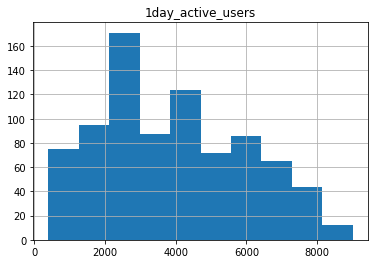

In [6]:
data.hist()

In [7]:
data['time'] = pd.to_datetime(data['time'],utc=True)
data.set_index('time', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Year')

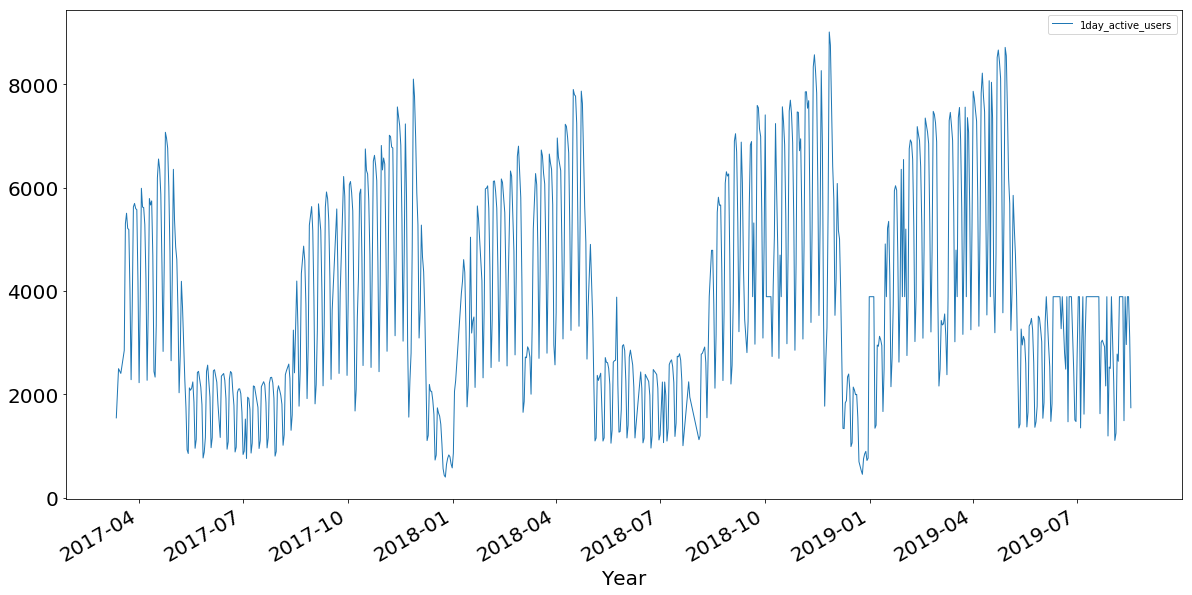

In [8]:
data.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

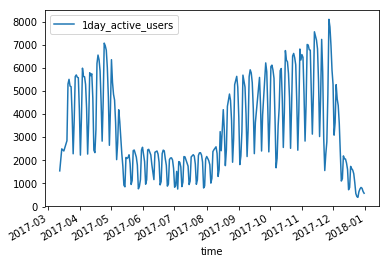

In [9]:
data.loc['2017'].plot()

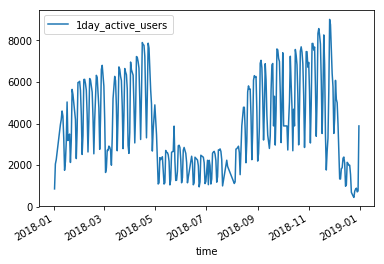

In [10]:
data.loc['2018'].plot()

In [11]:
alpha = norm.fit(data['1day_active_users'])[0]
beta = norm.fit(data['1day_active_users'])[1]

In [12]:
oiu = data['1day_active_users']

In [13]:
density = kde.gaussian_kde(oiu, bw_method=None)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


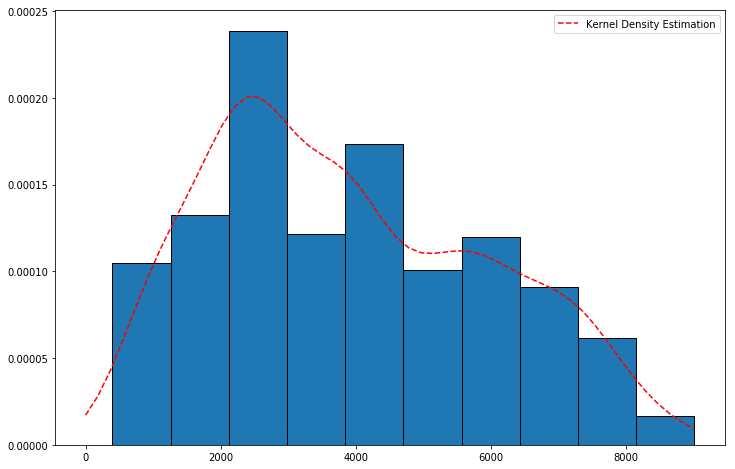

In [15]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)
l3, = plt.plot(x, density(x), 'r--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

In [16]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])

In [17]:
kstest(oiu,my_cdf)

KstestResult(statistic=0.04077787465143379, pvalue=0.1227061621469554)

In [52]:
df = pd.read_csv('google_drive_nanreplaced.csv')
df['1day_active_users'] = df['1day_active_users'].astype(int)
data=df['1day_active_users']